In [1]:
import pandas as pd
import numpy as np 
import copy
from matplotlib import pyplot as plt
import seaborn as sns
from collections import *
import datetime

In [2]:
dc=pd.read_excel(r"C:\Users\Mark 1\tamprd_df_strd.xlsx")
dc = dc.loc[:, ~dc.columns.str.contains('^Unnamed')]
dc.tail()

,date,original_val,mean_based,max_based,mean_max_based,max_mean_based,mean_last_based,last_mean_based,last_based,middle_based
164,2020-09-08,4367449,4108939,4373997,4369205,4113445,4369205,4094600,4353958,4109297
165,2020-09-09,4462978,4196571,4465873,4460862,4201285,4460862,4194996,4459188,4203494
166,2020-09-10,4559738,4286084,4563555,4558353,4290975,4558353,4288193,4560597,4296345
167,2020-09-11,4559738,4377399,4662496,4657061,4382507,4657061,4378841,4658596,4353958
168,2020-09-11,0,4377399,4662496,4657061,4382507,4657061,4378841,4658596,4353958


In [3]:
dce=pd.read_excel(r"C:\Users\Mark 1\tamerrprd_df_strd.xlsx")
dce = dce.loc[:, ~dce.columns.str.contains('^Unnamed')]
errdf=dce=dce.loc[:,["date","mb","mxb","mxb","memb","mxmb","mlb","lmb","lb","mdb"]]
errdf.tail()

,date,mb,mxb,mxb,memb,mxmb,mlb,lmb,lb,mdb
164,2020-09-08,258510,-6548,-6548,-1756,254004,-1756,272849,13491,258152
165,2020-09-09,266407,-2895,-2895,2116,261693,2116,267982,3790,259484
166,2020-09-10,273654,-3817,-3817,1385,268763,1385,271545,-859,263393
167,2020-09-11,182339,-102758,-102758,-97323,177231,-97323,180897,-98858,205780
168,2020-09-11,-4377399,-4662496,-4662496,-4657061,-4382507,-4657061,-4378841,-4658596,-4353958


In [4]:
erdt=pd.read_excel(r"C:\Users\Mark 1\tcerr_df.xlsx")
erdt = erdt.loc[:, ~erdt.columns.str.contains('^Unnamed')]
erdt['original_val']=erdt['original_val'].astype('int')
erdt['date']=erdt['date'].astype('datetime64[ns]')
erdt.tail()

,date,mipe,mxne,mipv,mxnv,original_val,pprd_val,nprd_val
164,2020-09-08,lb,memb,13491,-1756,4367449,4353958,4369205
165,2020-09-09,memb,mxb,2116,-2895,4462978,4460862,4465873
166,2020-09-10,memb,lb,1385,-859,4559738,4558353,4560597
167,2020-09-11,mxmb,memb,177231,-97323,4559738,4382507,4657061
168,2020-09-11,No,mdb,No,-4353958,0,No,4353958


In [5]:
erdtpv=erdt[erdt['mipv']!='No']
erdtpv['mipe']=erdtpv['mipe'].astype('str')
erdtpv['mipv']=erdtpv['mipv'].astype('int')
erdtpv['pprd_val']=erdtpv['pprd_val'].astype('int')
erdtpv

<ipython-input-5-ba78fec52151>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erdtpv['mipe']=erdtpv['mipe'].astype('str')
<ipython-input-5-ba78fec52151>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erdtpv['mipv']=erdtpv['mipv'].astype('int')
<ipython-input-5-ba78fec52151>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

,date,mipe,mxne,mipv,mxnv,original_val,pprd_val,nprd_val
0,2020-03-31,mxb,No,31,No,1635,1604,No
1,2020-04-01,mxb,No,43,No,2059,2016,No
2,2020-04-02,memb,mxb,119,-48,2545,2426,2593
3,2020-04-03,memb,lb,60,-41,3105,3045,3146
4,2020-04-04,mxmb,memb,1376,-35,3684,2308,3719
...,...,...,...,...,...,...,...,...
163,2020-09-08,mxmb,lb,164152,-76361,4277597,4113445,4353958
164,2020-09-08,lb,memb,13491,-1756,4367449,4353958,4369205
165,2020-09-09,memb,mxb,2116,-2895,4462978,4460862,4465873
166,2020-09-10,memb,lb,1385,-859,4559738,4558353,4560597


In [6]:
erdtnv=erdt[erdt['mxnv']!='No']
erdtnv['mxne']=erdtnv['mxne'].astype('str')
erdtnv['mxnv']=erdtnv['mxnv'].astype('int')
erdtnv['nprd_val']=erdtnv['nprd_val'].astype('int')
erdtnv

<ipython-input-6-532af38dbbcd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erdtnv['mxne']=erdtnv['mxne'].astype('str')
<ipython-input-6-532af38dbbcd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erdtnv['mxnv']=erdtnv['mxnv'].astype('int')
<ipython-input-6-532af38dbbcd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

,date,mipe,mxne,mipv,mxnv,original_val,pprd_val,nprd_val
2,2020-04-02,memb,mxb,119,-48,2545,2426,2593
3,2020-04-03,memb,lb,60,-41,3105,3045,3146
4,2020-04-04,mxmb,memb,1376,-35,3684,2308,3719
5,2020-04-05,mxmb,lb,1506,-78,4293,2787,4371
6,2020-04-06,mxmb,lb,1422,-226,4777,3355,5003
...,...,...,...,...,...,...,...,...
164,2020-09-08,lb,memb,13491,-1756,4367449,4353958,4369205
165,2020-09-09,memb,mxb,2116,-2895,4462978,4460862,4465873
166,2020-09-10,memb,lb,1385,-859,4559738,4558353,4560597
167,2020-09-11,mxmb,memb,177231,-97323,4559738,4382507,4657061


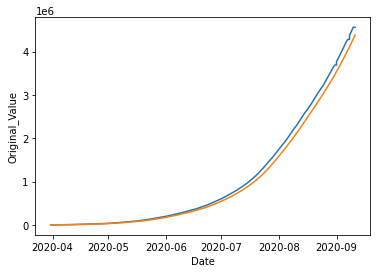

In [7]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-1], dc['original_val'][:len(dc)-1])
ax.set_xlabel("Date")
ax.set_ylabel("Original_Value")
ax.plot(dc['date'][:len(dc)-1], dc['mean_based'][:len(dc)-1])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

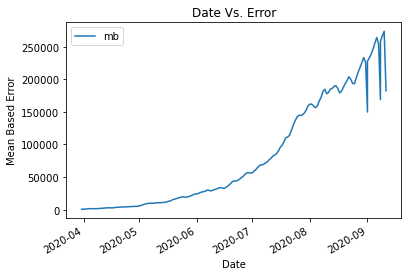

In [8]:
errdf[:len(errdf)-1].plot(x="date",y="mb")
plt.xlabel("Date")
plt.ylabel("Mean Based Error")
plt.title("Date Vs. Error")


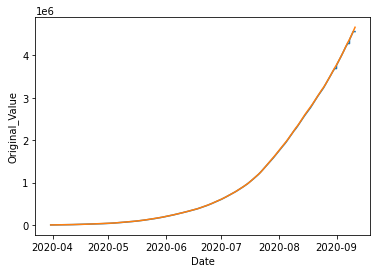

In [9]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-1], dc['original_val'][:len(dc)-1])
ax.set_xlabel("Date")
ax.set_ylabel("Original_Value")
ax.plot(dc['date'][:len(dc)-1], dc['max_based'][:len(dc)-1])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

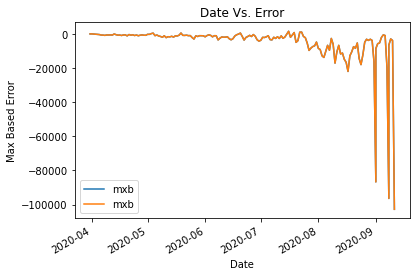

In [10]:
errdf[:len(errdf)-1].plot(x="date",y="mxb")
plt.xlabel("Date")
plt.ylabel("Max Based Error")
plt.title("Date Vs. Error")


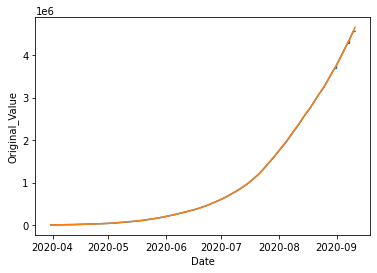

In [11]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-1], dc['original_val'][:len(dc)-1])
ax.set_xlabel("Date")
ax.set_ylabel("Original_Value")
ax.plot(dc['date'][:len(dc)-1], dc['mean_max_based'][:len(dc)-1])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

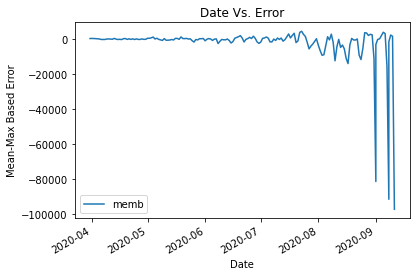

In [12]:
errdf[:len(errdf)-1].plot(x="date",y="memb")
plt.xlabel("Date")
plt.ylabel("Mean-Max Based Error")
plt.title("Date Vs. Error")


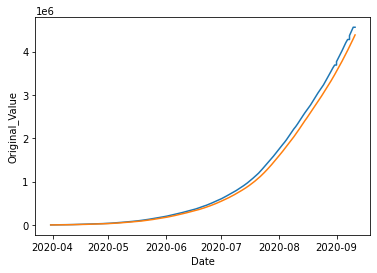

In [13]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-1], dc['original_val'][:len(dc)-1])
ax.set_xlabel("Date")
ax.set_ylabel("Original_Value")
ax.plot(dc['date'][:len(dc)-1], dc['max_mean_based'][:len(dc)-1])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

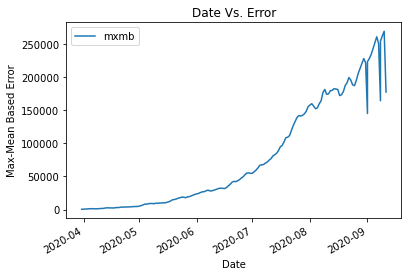

In [14]:
errdf[:len(errdf)-1].plot(x="date",y="mxmb")
plt.xlabel("Date")
plt.ylabel("Max-Mean Based Error")
plt.title("Date Vs. Error")


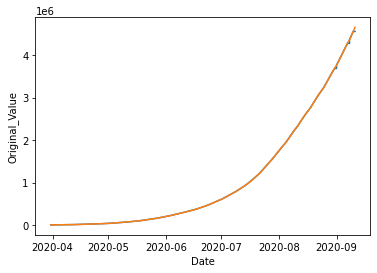

In [15]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-1], dc['original_val'][:len(dc)-1])
ax.set_xlabel("Date")
ax.set_ylabel("Original_Value")
ax.plot(dc['date'][:len(dc)-1], dc['last_based'][:len(dc)-1])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

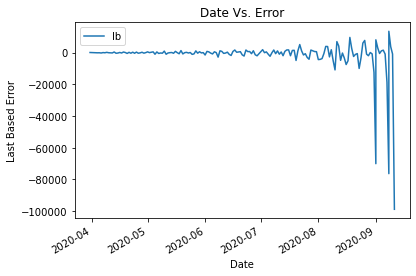

In [16]:
errdf[:len(errdf)-1].plot(x="date",y="lb")
plt.xlabel("Date")
plt.ylabel("Last Based Error")
plt.title("Date Vs. Error")


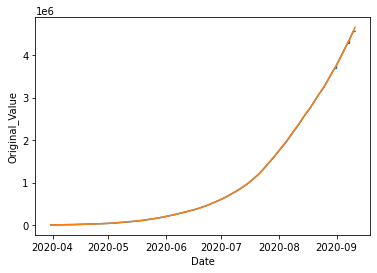

In [17]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-1], dc['original_val'][:len(dc)-1])
ax.set_xlabel("Date")
ax.set_ylabel("Original_Value")
ax.plot(dc['date'][:len(dc)-1], dc['mean_last_based'][:len(dc)-1])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

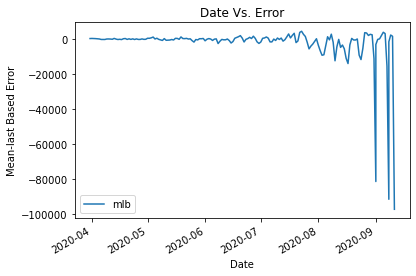

In [18]:
errdf[:len(errdf)-1].plot(x="date",y="mlb")
plt.xlabel("Date")
plt.ylabel("Mean-last Based Error")
plt.title("Date Vs. Error")


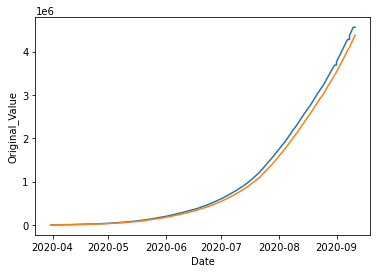

In [19]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-1], dc['original_val'][:len(dc)-1])
ax.set_xlabel("Date")
ax.set_ylabel("Original_Value")
ax.plot(dc['date'][:len(dc)-1], dc['last_mean_based'][:len(dc)-1])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

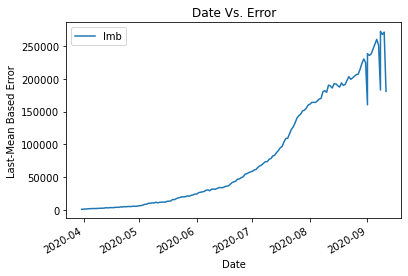

In [20]:
errdf[:len(errdf)-1].plot(x="date",y="lmb")
plt.xlabel("Date")
plt.ylabel("Last-Mean Based Error")
plt.title("Date Vs. Error")


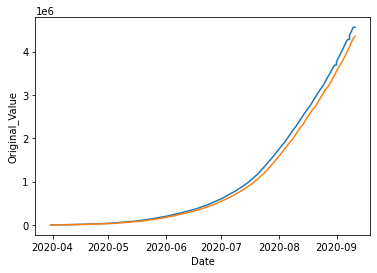

In [21]:
fig,ax=plt.subplots()
ax.plot(dc['date'][:len(dc)-1], dc['original_val'][:len(dc)-1])
ax.set_xlabel("Date")
ax.set_ylabel("Original_Value")
ax.plot(dc['date'][:len(dc)-1], dc['middle_based'][:len(dc)-1])
plt.show()

Text(0.5, 1.0, 'Date Vs. Error')

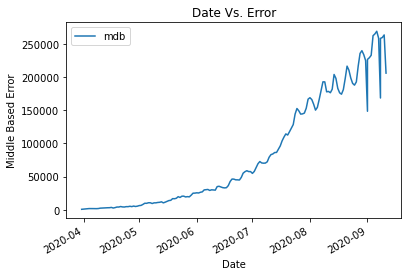

In [22]:
errdf[:len(errdf)-1].plot(x="date",y="mdb")
plt.xlabel("Date")
plt.ylabel("Middle Based Error")
plt.title("Date Vs. Error")


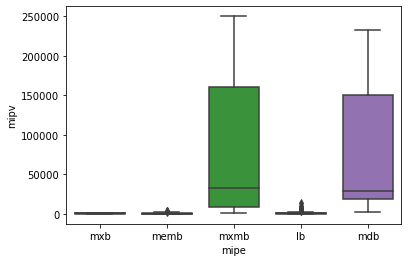

In [23]:
sns.boxplot(x='mipe',y='mipv',data=erdtpv,width=0.75)


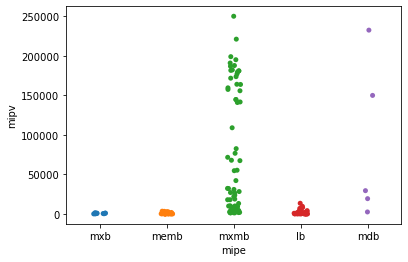

In [24]:
sns.stripplot(x='mipe',y='mipv',data=erdtpv,jitter=True)

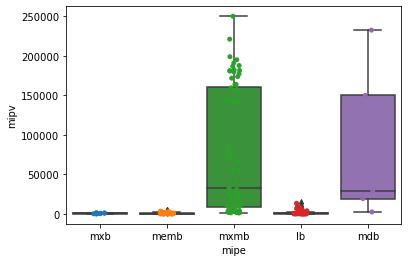

In [25]:
sns.boxplot(x='mipe',y='mipv',data=erdtpv)

sns.stripplot(x='mipe',y='mipv',data=erdtpv,jitter=True)

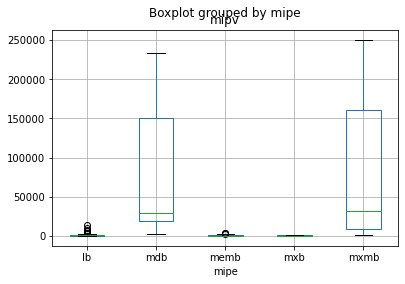

In [26]:
erdtpv.boxplot(by='mipe', column=['mipv'], grid=True)

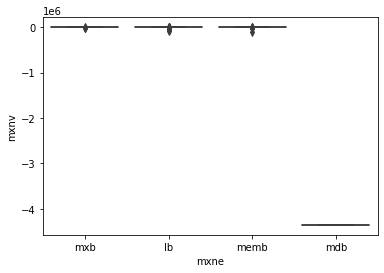

In [27]:
sns.boxplot(x='mxne',y='mxnv',data=erdtnv)

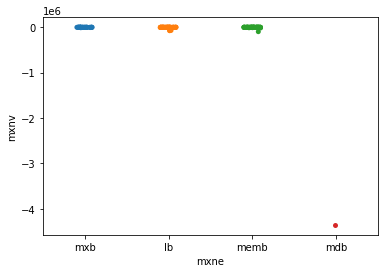

In [28]:
sns.stripplot(x='mxne',y='mxnv',data=erdtnv,jitter=True)

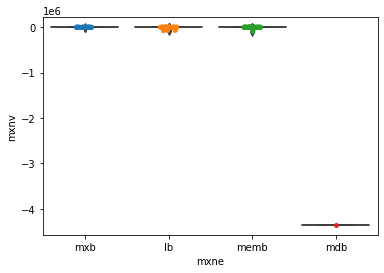

In [29]:
sns.boxplot(x='mxne',y='mxnv',data=erdtnv)
sns.stripplot(x='mxne',y='mxnv',data=erdtnv,jitter=True)

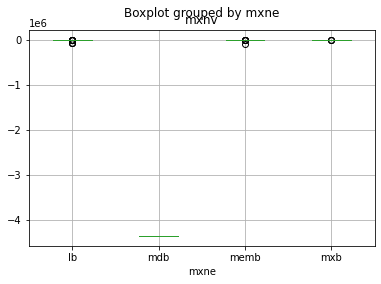

In [30]:
erdtnv.boxplot(by='mxne', column=['mxnv'], grid=True)